## Decomposition task for Retail: Loyalty program Analysis

### Step 1. Open file and perform data preprocessing.

1. Change datatypes if needed
2. Fill NaN values if needed
3. Delete duplicate rows if needed

### Step 2. Perform Exploratory Data Analysis and calculate metrics.

#### Goal: Analyze store traffic.

1. Identify how many clients the store has daily/weekly/monthly, find monthly percentage change
2. Identify how many clients each shop has monthly
3. How often do the customers come back?
4. How often do the loyal program customers buy products? Do they return after one week, two weeks or is the pattern random?

#### Goal: Product analysis.

1. Identify how many clients have loyalty program
2. Identify which products loyalty program clients buy the most (How much revenue did each product bring?)
3. Identify which products non-loyalty program clients buy the most (How much revenue did each product bring?)

#### Goal: Analyze revenue changes.

1. Identify the weekly/monthly revenue
2. Identify top 10 products which were the most profitable
3. Identify top 10 shops by revenue
4. Make cohort analysis to identify: 1. number of orders, 2.average number of orders per customer, 3. average revenue per paying customer, 4.average revenue per customer

#### Link to the presentation: https://docs.google.com/presentation/u/2/d/1cue6cwhRh1p4YfLQAmKNnv8XCnQ7RVsN/edit?usp=drive_web&ouid=107224902273622937964&rtpof=true
#### Link to the dashboard: https://public.tableau.com/profile/gaini4634#!/

## Step 1.  Open file and perform data preprocessing.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
product_codes = pd.read_csv('product_codes_us.csv', ';')
product_codes

,productID,price_per_one
0,10002,0.85
1,10080,0.85
2,10120,0.21
3,10123C,0.65
4,10124A,0.42
...,...,...
3154,gift_0001_20,16.67
3155,gift_0001_30,25.00
3156,gift_0001_40,34.04
3157,gift_0001_50,42.55


In [3]:
product_codes.isnull().sum()

productID        0
price_per_one    0
dtype: int64

In [4]:
product_codes.drop_duplicates(inplace=True)

In [5]:
retail = pd.read_csv('retail_dataset_us.csv')
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   purchaseid       105335 non-null  object 
 1   item_ID          105335 non-null  object 
 2   Quantity         105335 non-null  int64  
 3   purchasedate     105335 non-null  object 
 4   CustomerID       69125 non-null   float64
 5   loyalty_program  105335 non-null  int64  
 6   ShopID           105335 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 5.6+ MB


In [6]:
retail.isnull().sum()

purchaseid             0
item_ID                0
Quantity               0
purchasedate           0
CustomerID         36210
loyalty_program        0
ShopID                 0
dtype: int64

A lot of customers do not have an ID, they all probably belong to the general group of clients. Since 36210 row is too much to ignore, these rows will not be deleted. Moreover, all of them contain information for other columns. Other columns do not have NaN values, so this step is done.

In [7]:
retail.drop_duplicates(inplace=True)

In [8]:
retail['purchasedate'] = pd.to_datetime(retail['purchasedate'], format='%Y-%m-%d %H:%M:%S')
retail['loyalty_program'] = pd.to_numeric(retail['loyalty_program'] , downcast='integer')
retail['CustomerID'] = retail['CustomerID'].astype(str)
retail.fillna('unknown', inplace=True)

In [9]:
retail['date'] = retail['purchasedate'].dt.date
retail['week'] = retail['purchasedate'].dt.week
retail['month'] = retail['purchasedate'].dt.month

Data preprocessing part is finished. The data is checked for NaN values and duplicates, the datatypes are changedd where needed.

### Step 2. Perform Exploratory Data Analysis and calculate metrics.

#### Analyze store traffic

In [10]:
dau = retail.groupby('date').agg({'CustomerID':'nunique'}).mean()
print('Daily number of unique paying customers', int(dau))

Daily number of unique paying customers 53


In [11]:
wau = retail.groupby('week').agg({'CustomerID': 'nunique'}).mean()
print('Weekly number of unique paying customers', int(wau))

Weekly number of unique paying customers 254


In [12]:
mau = retail.groupby('month').agg({'CustomerID': 'nunique'}).mean()
print('Monthly number of unique paying customers', int(mau))

Monthly number of unique paying customers 844


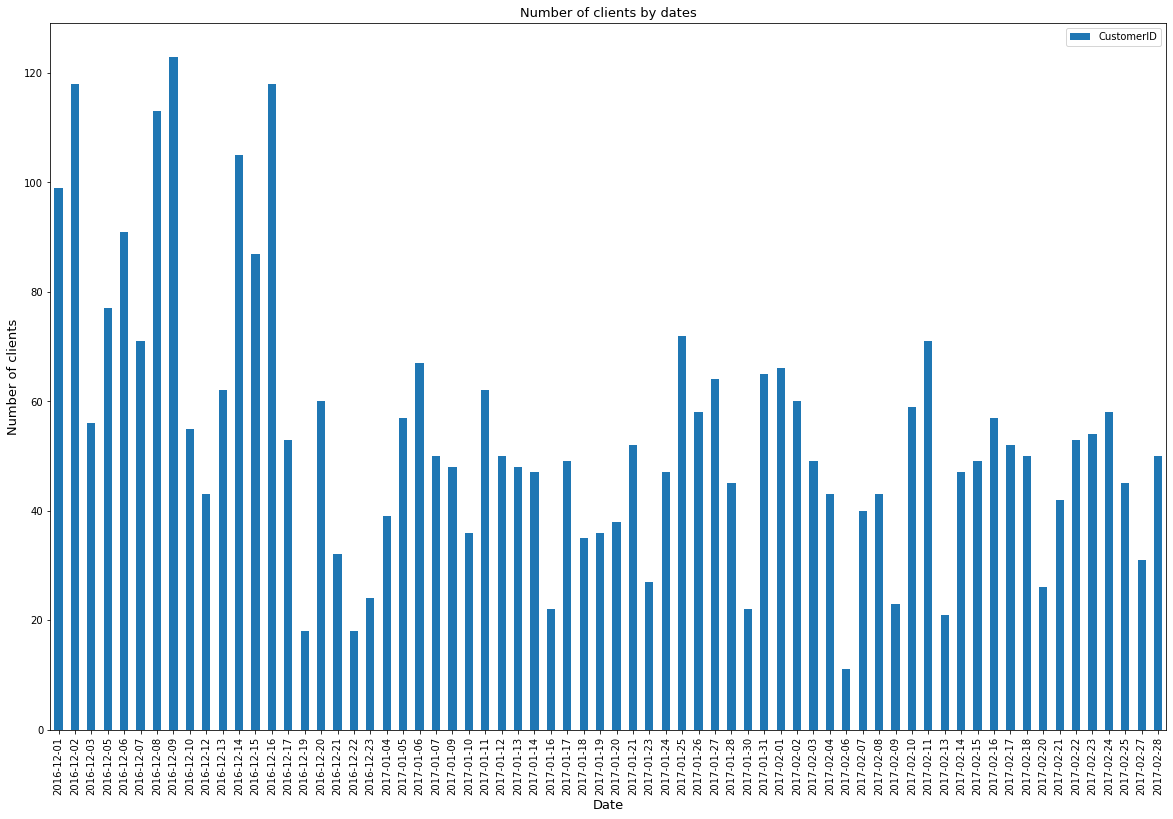

In [13]:
retail.groupby('date').agg({'CustomerID':'nunique'}).plot(kind='bar', figsize=(20, 13))
plt.xlabel('Date', fontsize=13)
plt.ylabel('Number of clients', fontsize=13)
plt.title('Number of clients by dates', fontsize=13)
plt.show()

Number of customers fluctuated from day to day
The highest number of customers – 2016-12-08
The lowest number of customers – 2017-02-07, (2 months later)
After Christmas average weekly number of clients dropped
Number of clients increases and decreases periodically, probably picks on midweek

In [14]:
monthly_pivot = retail.groupby('month').agg({'CustomerID':'nunique'}).reset_index(drop=False)
dec_jan = (monthly_pivot.loc[0, 'CustomerID'] / monthly_pivot.loc[2, 'CustomerID'] - 1)*100
print('Percentage Change in unique customers number for December-January: ', round(dec_jan, 3), '%')

Percentage Change in unique customers number for December-January:  -17.387 %


In [15]:
jan_feb = (monthly_pivot.loc[1, 'CustomerID'] / monthly_pivot.loc[0, 'CustomerID'] - 1)*100
print('Percentage Change in unique customers number January-February: ', round(jan_feb, 3), '%')

Percentage Change in unique customers number January-February:  1.913 %


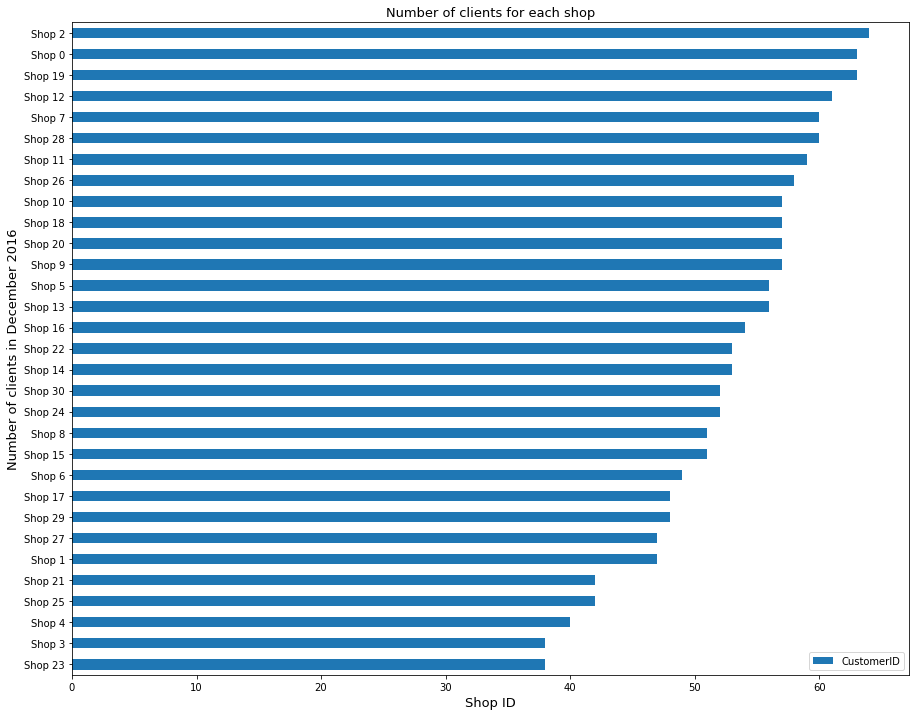

In [16]:
customers_shops = retail.groupby(['month', 'ShopID']).agg({'CustomerID':'nunique'}).reset_index(drop=False)
customers_shops.query('month==12').sort_values(by='CustomerID').plot(kind='barh', x='ShopID', y='CustomerID', figsize=(15, 12))
plt.xlabel('Shop ID', fontsize=13)
plt.ylabel('Number of clients in December 2016', fontsize=13)
plt.title('Number of clients for each shop', fontsize=13)
plt.show()

The most popular shop - Shop 2
The least popular shop – Shop 23
The shops had from 40-60 customers each

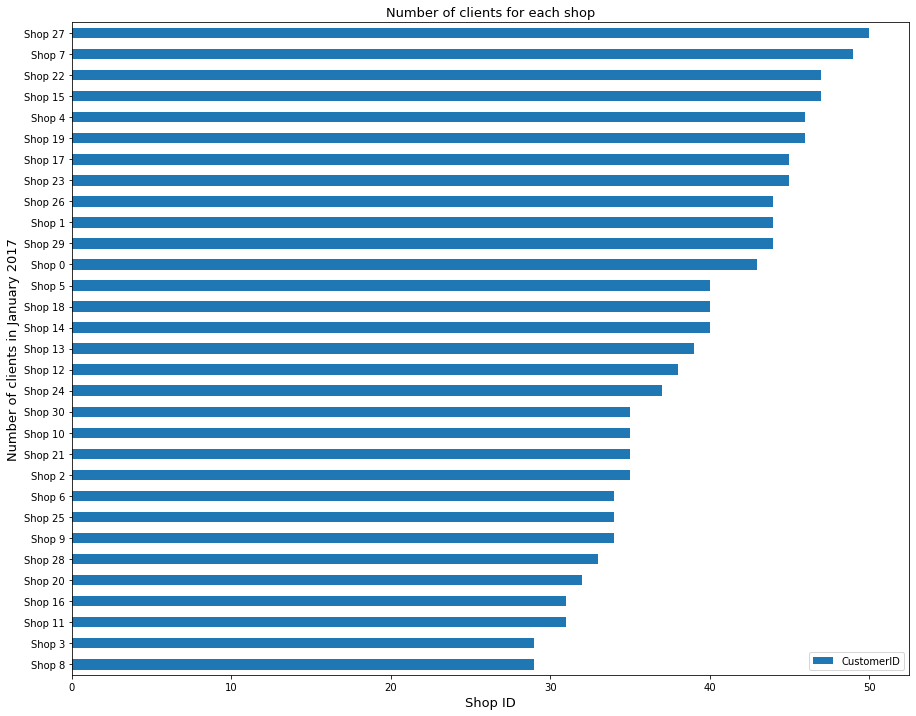

In [17]:
customers_shops.query('month==1').sort_values(by='CustomerID').plot(kind='barh', x='ShopID', y='CustomerID', figsize=(15, 12))
plt.xlabel('Shop ID', fontsize=13)
plt.ylabel('Number of clients in January 2017', fontsize=13)
plt.title('Number of clients for each shop', fontsize=13)
plt.show()

The most popular shop – Shop 27
The least popular shop – Shop 8 
Shop 2 was in bottom 10 in January, the opposite is true for Shop 23.

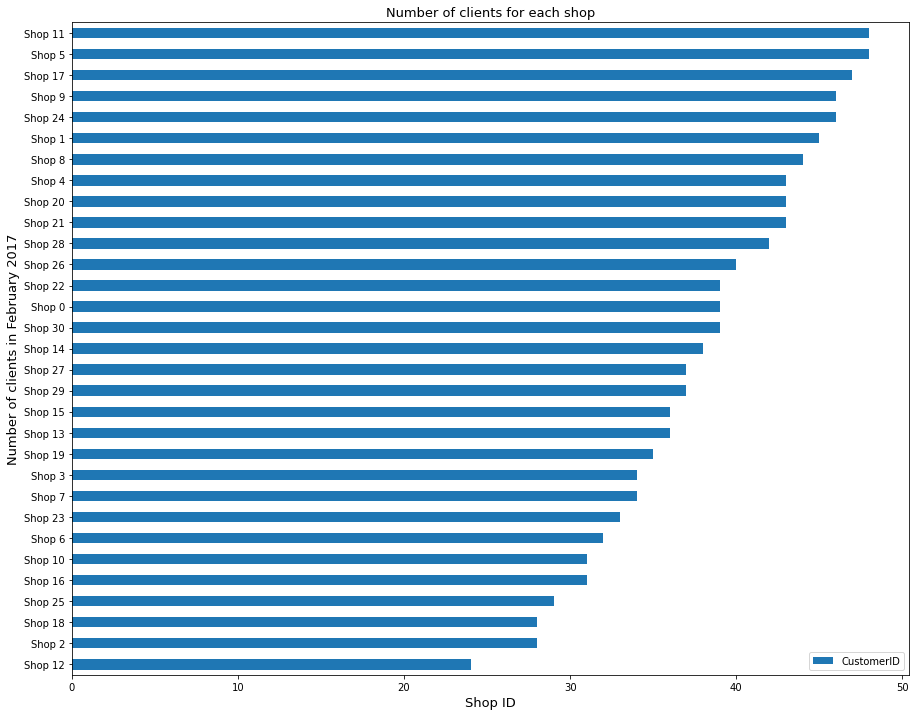

In [18]:
customers_shops.query('month==2').sort_values(by='CustomerID').plot(kind='barh', x='ShopID', y='CustomerID', figsize=(15, 12))
plt.xlabel('Shop ID', fontsize=13)
plt.ylabel('Number of clients in February 2017', fontsize=13)
plt.title('Number of clients for each shop', fontsize=13)
plt.show()

The most popular shop – Shop 11
The least popular shop – Shop 12
Shop 8 was in top 10 in February.

In [19]:
#loyalty_clients[(loyalty_clients['CustomerID']=='nan') | (loyalty_clients['CustomerID']=='unknown')]

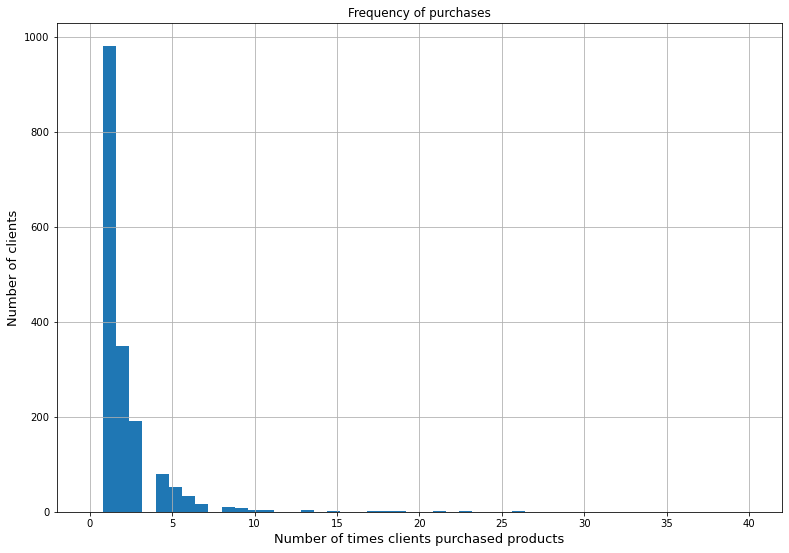

In [20]:
customer_buy_dates = retail.query('Quantity!=0').groupby(['CustomerID', 'date']).agg({'item_ID':'count'}).reset_index(drop=False)
customer_buy_dates = customer_buy_dates.query('CustomerID!="unknown" and CustomerID!="nan"')
customer_buy_dates.groupby('CustomerID').agg({'date':'count'}).hist(bins=50, range=(0,40), figsize=(13, 9))
plt.xlabel('Number of times clients purchased products', fontsize=13)
plt.ylabel('Number of clients', fontsize=13)
plt.title('Frequency of purchases')
plt.show()

The majority of clients do not make more than 5 purchases
The shop has ~20-30 clients who made purchases consistently (more than 20 times)

In [21]:
purchase_freq = customer_buy_dates.groupby('CustomerID').agg({'date':'count'}).reset_index(drop=False)
purchase_freq = purchase_freq.query('date>=5').reset_index(drop=True)

loyal_ID_list = purchase_freq.CustomerID.unique()
loyal_ID_group = retail.query('CustomerID in @loyal_ID_list').groupby(['CustomerID', 'date']).agg({'item_ID':'count'})\
                .reset_index(drop=False)
loyal_ID_pivot = loyal_ID_group.pivot(index='date', columns='CustomerID', values='item_ID')

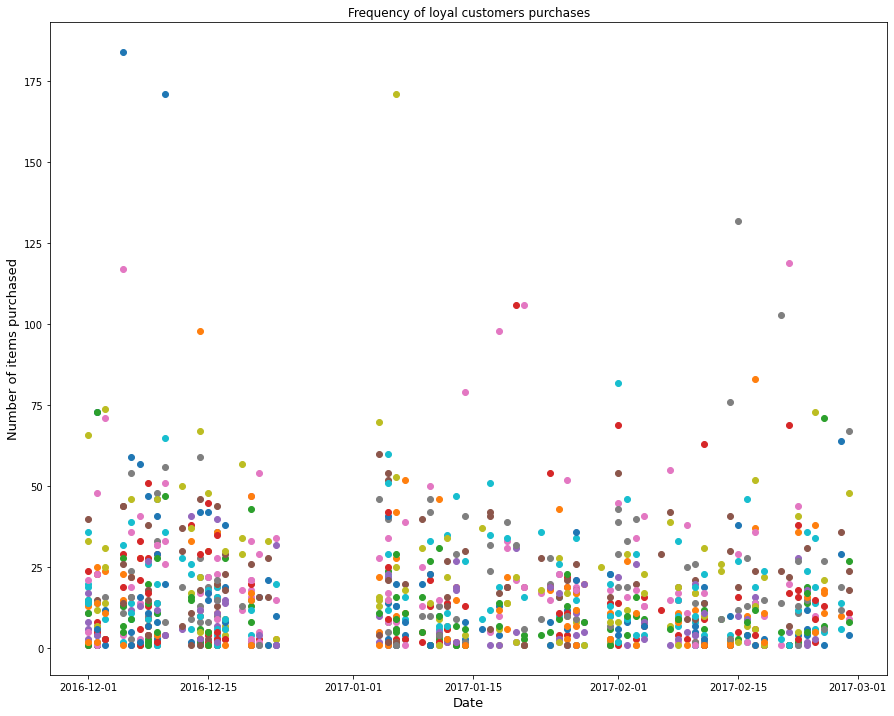

In [22]:
loyal_ID_pivot.plot(figsize=(15, 12), style='o', legend=False)
plt.xlabel('Date', fontsize=13)
plt.ylabel('Number of items purchased', fontsize=13)
plt.title('Frequency of loyal customers purchases')
plt.show()

The previous graph shows the number of times each loyalty program customer made a purchase and how many products he bought. A dot of one color represents one customer
The shop was probably closed at Christmas holidays therefore there is a gap between days
In general clients do not buy more than 60 products at once
Loyalty program customers are quite consistent.

#### Product analysis

In [23]:
retail.groupby('loyalty_program').agg({'CustomerID':'nunique'})

,CustomerID
loyalty_program,
0,1163
1,587


In [24]:
full_data = retail.merge(product_codes, left_on='item_ID', right_on='productID', how='left')

In [25]:
full_data['purchase_revenue'] = full_data['Quantity'] * full_data['price_per_one']

In [26]:
full_data.purchase_revenue = full_data.purchase_revenue.abs()

In [27]:
full_data.Quantity = full_data.Quantity.abs()

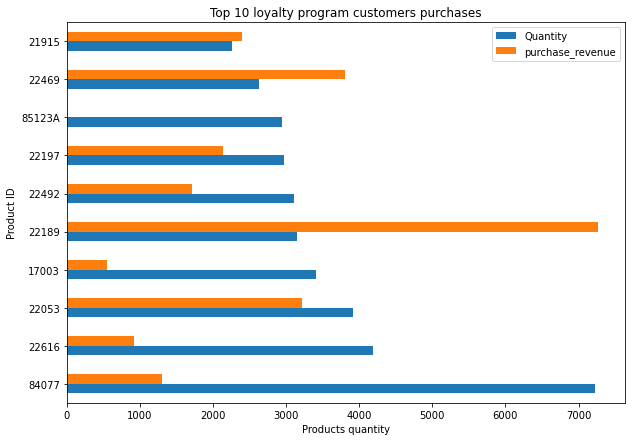

In [28]:
loyalty_clients = full_data.query('loyalty_program==1').reset_index(drop=True)
top10_loyalty_customers_products = loyalty_clients.query('Quantity!=0').groupby('item_ID').agg({'Quantity':'sum', 'purchase_revenue':'sum'})\
                                  .sort_values(by='Quantity', ascending=False).head(10)
top10_loyalty_customers_products.plot(kind='barh', figsize=(10, 7))
plt.title('Top 10 loyalty program customers purchases')
plt.xlabel('Products quantity')
plt.ylabel('Product ID')
plt.show()

The graph on the left shows the most frequently bought product among loyalty program customers and the product revenue.
As can be seen the product’s quantity and revenue do not correlate
The most popular product actually brings much less revenue than less popular products.

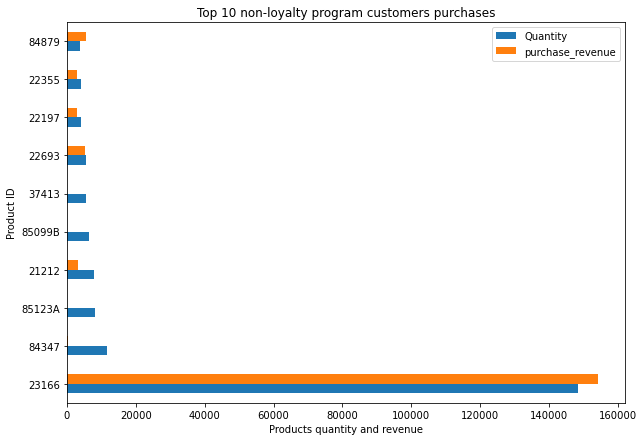

In [29]:
nonloyalty_clients = full_data.query('loyalty_program==0').reset_index(drop=True)
top10_nonloyalty_customers_products = nonloyalty_clients.query('Quantity!=0').groupby('item_ID').agg({'Quantity':'sum', 'purchase_revenue':'sum'})\
                                  .sort_values(by='Quantity', ascending=False).head(10)
top10_nonloyalty_customers_products.plot(kind='barh', figsize=(10, 7))
plt.title('Top 10 non-loyalty program customers purchases')
plt.xlabel('Products quantity and revenue')
plt.ylabel('Product ID')
plt.show()

Id23166 is the most popular product among general customers and it also brough the most revenue
Other products brought much less brought much less revenue compared to Id23166
In general nonloyal and loyal customers prefer different products.

#### Analyze revenue changes

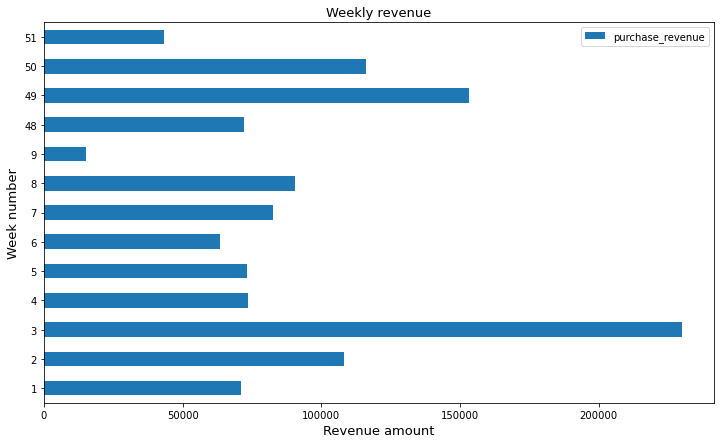

In [30]:
full_data.groupby('week').agg({'purchase_revenue':'sum'}).plot(kind='barh', figsize=(12, 7))
plt.xlabel('Revenue amount', fontsize=13)
plt.ylabel('Week number', fontsize=13)
plt.title('Weekly revenue', fontsize=13)
plt.show()

The graph shows weekly revenue fluctuations
Weeks 48-51 – December
Weeks 1-5 – January
Weeks 6-9 – February
The highest revenue amount was on a week before Christmas
The lowest revenue amount – week 9 of February.

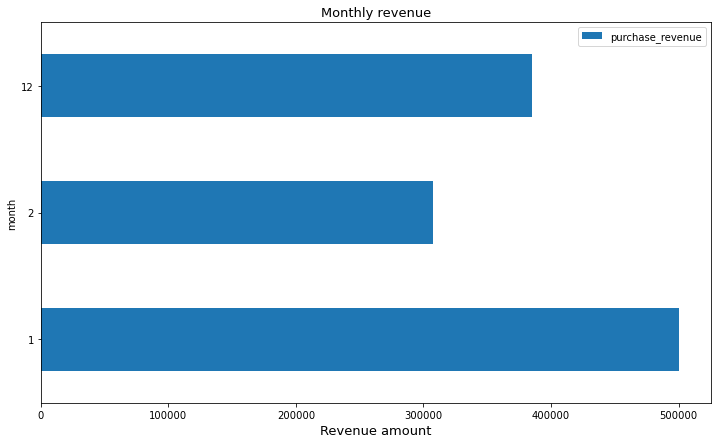

In [31]:
#full_data.month.replace({1: 'January 2017', 2:'February 2017', 12:'December 2016'}, inplace=True)
full_data.groupby('month').agg({'purchase_revenue':'sum'}).plot(kind='barh', figsize=(12, 7))
plt.xlabel('Revenue amount', fontsize=13)
plt.title('Monthly revenue', fontsize=13)
plt.show()

The graph shows monthly revenue amount
January had the highest revenue amount due to largest number of weeks.

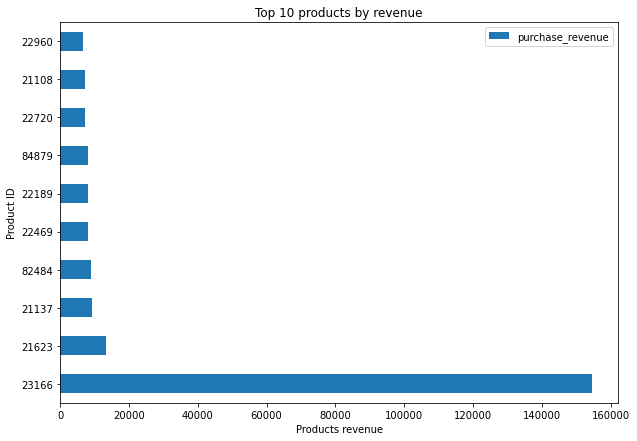

In [32]:
top_10_products_by_revenue = full_data.groupby('item_ID').agg({'purchase_revenue':'sum'})\
                                      .sort_values(by='purchase_revenue', ascending=False).head(10)
top_10_products_by_revenue.plot(kind='barh', figsize=(10, 7))
plt.title('Top 10 products by revenue')
plt.xlabel('Products revenue')
plt.ylabel('Product ID')
plt.show()

The graph on the left shows top 10 products by revenue
Id223166 was the most popular among clients and brought the highest amount of revenue
Other products that belong to the top have approximately same revenue levels.

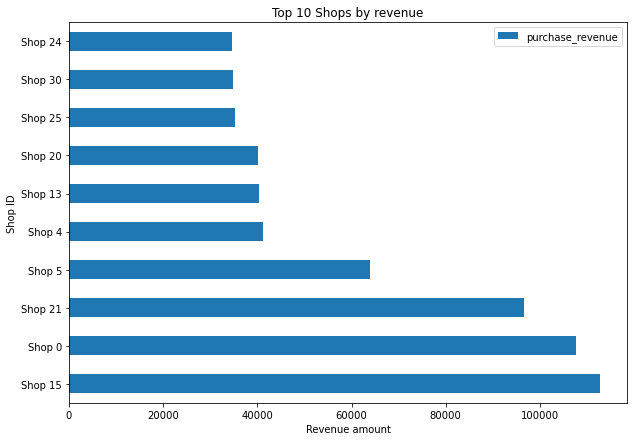

In [33]:
top_10_shops_by_revenue = full_data.groupby('ShopID').agg({'purchase_revenue':'sum'})\
                                      .sort_values(by='purchase_revenue', ascending=False).head(10)
top_10_shops_by_revenue.plot(kind='barh', figsize=(10, 7))
plt.title('Top 10 Shops by revenue')
plt.xlabel('Revenue amount')
plt.ylabel('Shop ID')
plt.show()

The graph on the left shows top 10 shops with the highest revenue
As can be seen Shop 15 had the highest total revenue for  3 months period
Interestingly enough, Shop 15 had never been the top popular shop during the period of analysis.

#### Cohort analysis

In [34]:
full_data = full_data.query('CustomerID!="nan"')

In [35]:
first_orders = loyalty_clients.groupby('CustomerID')['purchasedate'].min().reset_index()
first_orders.columns = ['CustomerID', 'first_purchase_dt']
first_orders['first_purchase_month'] = first_orders['first_purchase_dt'].astype('datetime64[M]')

In [36]:
first_orders

,CustomerID,first_purchase_dt,first_purchase_month
0,22005.0,2017-01-09 12:01:00,2017-01-01
1,22006.0,2016-12-05 12:43:00,2016-12-01
2,22011.0,2017-02-07 14:16:00,2017-02-01
3,22012.0,2017-02-03 10:50:00,2017-02-01
4,22018.0,2017-02-28 13:41:00,2017-02-01
...,...,...,...
582,23938.0,2016-12-08 13:38:00,2016-12-01
583,23939.0,2016-12-16 18:23:00,2016-12-01
584,23948.0,2016-12-08 13:53:00,2016-12-01
585,23956.0,2017-01-25 12:34:00,2017-01-01


In [37]:
loyalty_clients = loyalty_clients.merge(first_orders, on='CustomerID', how='left')

In [38]:
loyalty_clients['purchase_month'] = loyalty_clients['purchasedate'].astype('datetime64[M]')

In [39]:
cohorts = loyalty_clients.groupby(['first_purchase_month', 'purchase_month']).agg({'purchasedate':'nunique', 'CustomerID':'nunique', 'purchase_revenue': 'sum'}).reset_index()

cohorts['cohort_lifetime'] = ((cohorts['purchase_month'] - cohorts['first_purchase_month']) / np.timedelta64(1,'M')).round()
cohorts.columns = ['first_purchase_month', 'purchase_month', 'number_of_transactions','' 'number_of_clients', 'purchase_revenue', 'cohort_lifetime']

cohort_sizes = first_orders.groupby('first_purchase_month').agg({'CustomerID': 'nunique'}).reset_index()
cohort_sizes.rename(columns={'CustomerID': 'cohort_size'}, inplace=True)
 
cohorts_report = pd.merge(cohort_sizes, cohorts, on = 'first_purchase_month')
cohorts_report['rev_per_buyer'] = cohorts_report['purchase_revenue'] / cohorts_report['number_of_clients']
 
lifetime_pivot = cohorts_report.pivot_table(
    index='first_purchase_month', 
    columns='cohort_lifetime', 
    values='rev_per_buyer', 
    aggfunc='sum'
)
cohorts_report

,first_purchase_month,cohort_size,purchase_month,number_of_transactions,number_of_clients,purchase_revenue,cohort_lifetime,rev_per_buyer
0,2016-12-01,344,2016-12-01,589,344,113305.90,0.0,329.377616
1,2016-12-01,344,2017-01-01,189,115,41330.62,1.0,359.396696
2,2016-12-01,344,2017-02-01,188,121,55515.64,2.0,458.806942
3,2017-01-01,124,2017-01-01,154,124,25581.76,0.0,206.304516
4,2017-01-01,124,2017-02-01,43,30,6020.71,1.0,200.690333
5,2017-02-01,119,2017-02-01,159,119,34764.48,0.0,292.138487


In [40]:
cohorts_report[['first_purchase_month', 'purchase_month', 'cohort_size', 'number_of_clients']]

,first_purchase_month,purchase_month,cohort_size,number_of_clients
0,2016-12-01,2016-12-01,344,344
1,2016-12-01,2017-01-01,344,115
2,2016-12-01,2017-02-01,344,121
3,2017-01-01,2017-01-01,124,124
4,2017-01-01,2017-02-01,124,30
5,2017-02-01,2017-02-01,119,119


The table on the left shows the number of clients each cohort had initially and how many clients were active each consequent month
Number of clients from January  who returned  the next month dropped drastically
Each new cohort has less number of clients compared to the previous month

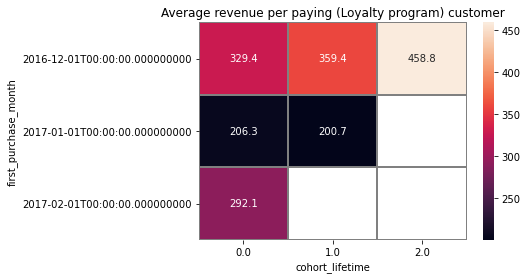

In [41]:
plt.title('Average revenue per paying (Loyalty program) customer')
sns.heatmap(lifetime_pivot, annot=True, fmt='.1f', linewidths=1, linecolor='gray')
plt.show()

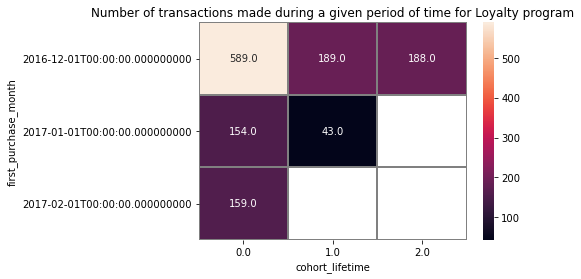

In [42]:
orders_pivot = cohorts_report.pivot_table(index='first_purchase_month',columns='cohort_lifetime',values='number_of_transactions',aggfunc='sum')
plt.title('Number of transactions made during a given period of time for Loyalty program')
sns.heatmap(orders_pivot, annot=True, fmt='.1f', linewidths=1, linecolor='gray')
plt.show()

The number of transactions decreases each consecutive month for one cohort.

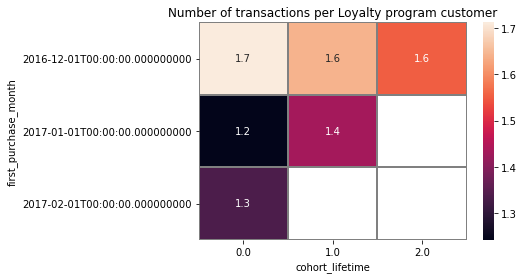

In [43]:
cohorts_report['order_per_client'] = cohorts_report['number_of_transactions'] / cohorts_report['number_of_clients']
orders_client_pivot = cohorts_report.pivot_table(index='first_purchase_month',columns='cohort_lifetime',values='order_per_client',aggfunc='max')
plt.title('Number of transactions per Loyalty program customer')
sns.heatmap(orders_client_pivot, annot=True, fmt='.1f', linewidths=1, linecolor='gray')
plt.show()

Though the cohort sizes decreases each month, the number of transactions per one customer seem to very stable.

### Conclusion

The loyalty program has shown to be quite successful as clients who sighed up for it actually are more consistent and make as big and sometimes even bigger purchases than the general customers.

Unfortunately, it was not possible to identify which offers, discounts and products were exclusive to loyalty program customers but it seems like the most popular products among these clients are available for general customers as well.

LPCs are very consistent and most of them bought products on a regular basis, the analysis identified at least 20 people who made more than 5 purchases, all of them are probably LPCs.

Even though the cohort analysis has shown that the number of customers decreased each consecutive month  (except for December cohort when some clients returned in February), the average transactions number stayed the same or even increased for some months. 

<b>Anton's comments: </b> Gaini, fantastic job! Really liked all the stuff you did! I would only mention that you did not need to do the presentation on A/B (it's not a minus - just be more careful of what is asked :) ). For the dashboards - it is really good that you connected the filter to all the dashboards. I would suggest you to separate colors in future - so that I won't mistake Android phones to APAC. Thank you for your ploject, good luck with everything - and keep in touch :)